# mace-mp-medium Inference Performance Benchmark


running the benchmarks:
```
pytest tests/test_benchmark.py --benchmark-save=<some name>
```
and to also include torch.compile benchmarks:
```
MACE_FULL_BENCH=1 pytest tests/test_benchmark.py --benchmark-save=<some name>
```

Next to process the saved benchmark results:
```
python tests/test_benchmark.py
```

This outputs the benchmark metrics as a csv which is analysed here.

In [1]:
import pandas as pd
import seaborn as sns

sns.set_style("whitegrid")


df = pd.read_csv("data.csv")
df

,num_atoms,num_edges,dtype,is_compiled,device_name,median,Steps per day,ns/day (1 fs/step)
0,216,34128,float32,False,NVIDIA H100 80GB HBM3,0.024912,3.469099e+06,3.468182
1,1000,158000,float32,False,NVIDIA H100 80GB HBM3,0.096278,8.974388e+05,0.897403
2,2744,433552,float32,False,NVIDIA H100 80GB HBM3,0.255766,3.377177e+05,0.337808
3,5832,921456,float32,False,NVIDIA H100 80GB HBM3,0.538791,1.603103e+05,0.160359
4,216,34128,float64,False,NVIDIA H100 80GB HBM3,0.039591,2.184192e+06,2.182328
5,1000,158000,float64,False,NVIDIA H100 80GB HBM3,0.164554,5.249702e+05,0.525055
6,2744,433552,float64,False,NVIDIA H100 80GB HBM3,0.443152,1.949661e+05,0.194967
7,216,34128,float32,True,NVIDIA H100 80GB HBM3,0.014138,6.098593e+06,6.111035
8,1000,158000,float32,True,NVIDIA H100 80GB HBM3,0.059438,1.453270e+06,1.453608
9,2744,433552,float32,True,NVIDIA H100 80GB HBM3,0.167153,5.169943e+05,0.516892


<Axes: xlabel='num_atoms', ylabel='Steps per day'>

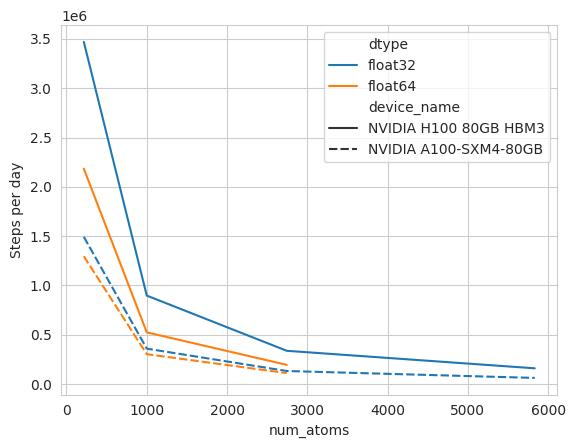

In [2]:
sns.lineplot(df[~df.is_compiled], x="num_atoms", y="Steps per day", hue="dtype", style="device_name")

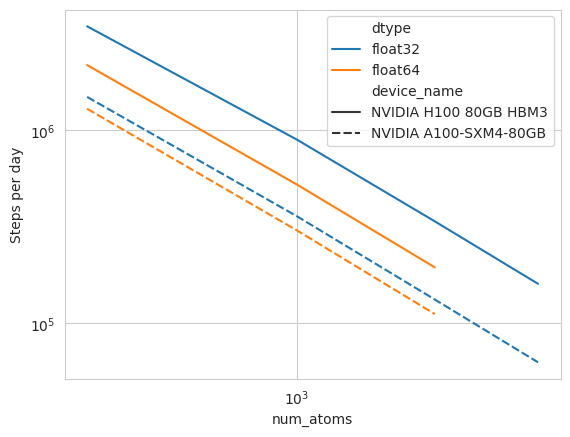

In [3]:
p = sns.lineplot(df[~df.is_compiled], x="num_atoms", y="Steps per day", hue="dtype", style="device_name")
p.set_xscale("log")
p.set_yscale("log")


In [4]:
mask = ~df.is_compiled & (df["dtype"] == "float64")
df64 = df[mask]
df64

,num_atoms,num_edges,dtype,is_compiled,device_name,median,Steps per day,ns/day (1 fs/step)
4,216,34128,float64,False,NVIDIA H100 80GB HBM3,0.039591,2.184192e+06,2.182328
5,1000,158000,float64,False,NVIDIA H100 80GB HBM3,0.164554,5.249702e+05,0.525055
6,2744,433552,float64,False,NVIDIA H100 80GB HBM3,0.443152,1.949661e+05,0.194967
16,216,34128,float64,False,NVIDIA A100-SXM4-80GB,0.066740,1.296175e+06,1.294585
17,1000,158000,float64,False,NVIDIA A100-SXM4-80GB,0.284442,3.036382e+05,0.303753
18,2744,433552,float64,False,NVIDIA A100-SXM4-80GB,0.774045,1.116135e+05,0.111621


Text(0, 0.5, 'Speedup A100 -> H100')

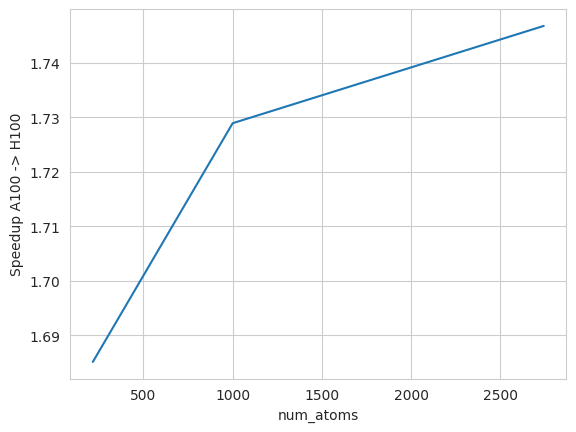

In [5]:
mask = df64["device_name"].str.contains("H100")
speedup = df64[mask]["Steps per day"].values / df64[~mask]["Steps per day"].values

ax = sns.lineplot(x=df64[mask]["num_atoms"], y=speedup)
ax.set_ylabel("Speedup A100 -> H100")


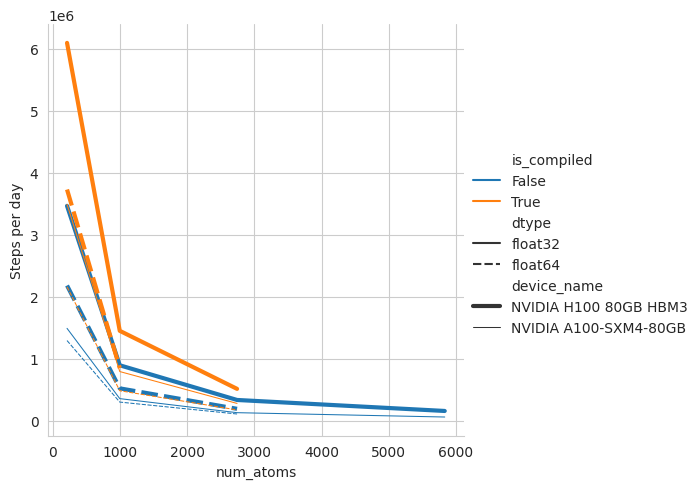

In [6]:
sns.relplot(data=df, x="num_atoms", y="Steps per day", style="dtype", hue="is_compiled", size="device_name", kind="line")